In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("dataset/m-blue.csv", index_col=False)


Correlation Matrix:
                      total_sales  competitor_KTD_S  competitor_Carabao_S
total_sales              1.000000          0.101491              0.315726
competitor_KTD_S         0.101491          1.000000              0.479952
competitor_Carabao_S     0.315726          0.479952              1.000000

Correlation with Total Sales:
Total Sales vs Competitor KTD: 0.1015
Total Sales vs Competitor Carabao: 0.3157


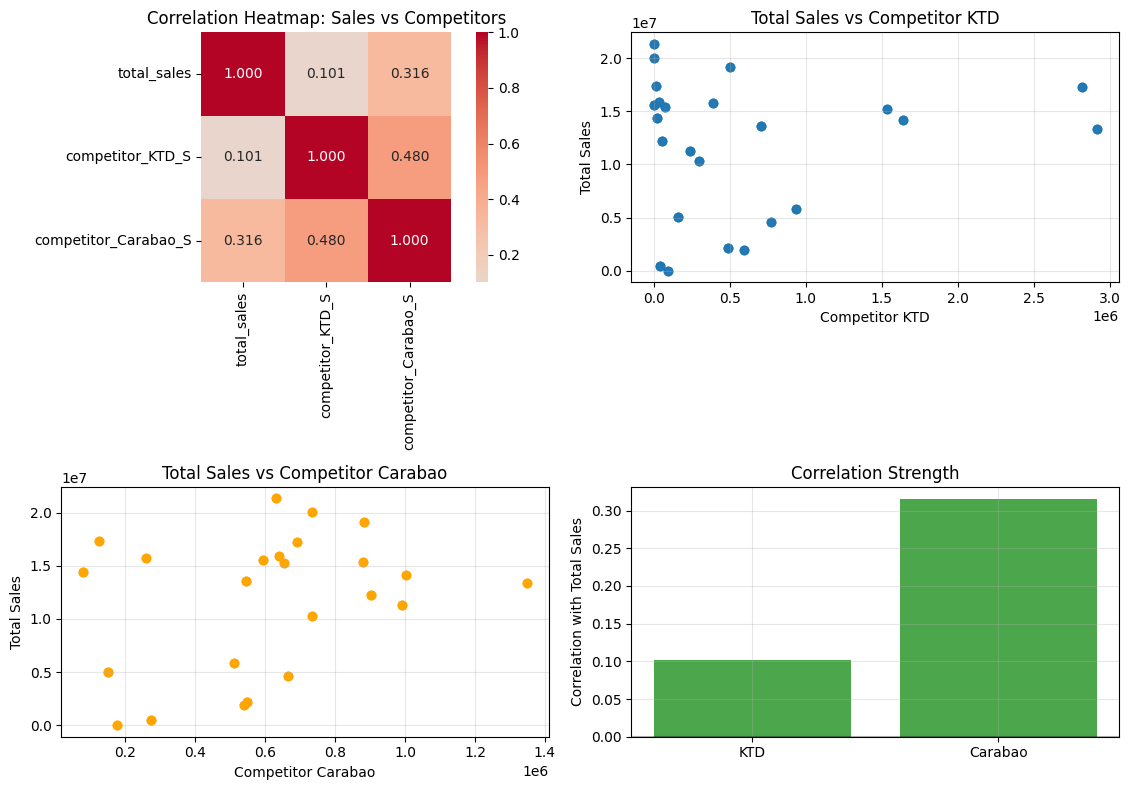


DETAILED CORRELATION ANALYSIS

competitor_KTD_S:
  Correlation coefficient: 0.1015
  P-value: 0.3053
  Significance: Not significant (α = 0.05)
  Interpretation: Weak positive correlation

competitor_Carabao_S:
  Correlation coefficient: 0.3157
  P-value: 0.0011
  Significance: Significant (α = 0.05)
  Interpretation: Moderate positive correlation

SUMMARY STATISTICS
        total_sales  competitor_KTD_S  competitor_Carabao_S
count  1.040000e+02      1.040000e+02          1.040000e+02
mean   1.158284e+07      5.680769e+05          5.991346e+05
std    6.310223e+06      7.996226e+05          3.117913e+05
min    8.750000e+03      0.000000e+00          8.000000e+04
25%    5.051600e+06      4.025000e+04          2.740000e+05
50%    1.357140e+07      2.380000e+05          6.300000e+05
75%    1.577300e+07      7.080000e+05          7.712500e+05
max    2.134475e+07      2.912500e+06          1.347500e+06


In [7]:
sales_competitor_cols = ['total_sales', 'competitor_KTD_S', 'competitor_Carabao_S']
correlation_data = df[sales_competitor_cols]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Extract specific correlations with total_sales
print("\nCorrelation with Total Sales:")
print(f"Total Sales vs Competitor KTD: {correlation_matrix.loc['total_sales', 'competitor_KTD_S']:.4f}")
print(f"Total Sales vs Competitor Carabao: {correlation_matrix.loc['total_sales', 'competitor_Carabao_S']:.4f}")

# Create visualization
plt.figure(figsize=(12, 8))

# Correlation heatmap
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Heatmap: Sales vs Competitors')

# Scatter plot: Total Sales vs Competitor KTD
plt.subplot(2, 2, 2)
plt.scatter(df['competitor_KTD_S'], df['total_sales'], alpha=0.6)
plt.xlabel('Competitor KTD')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Competitor KTD')
plt.grid(True, alpha=0.3)

# Scatter plot: Total Sales vs Competitor Carabao
plt.subplot(2, 2, 3)
plt.scatter(df['competitor_Carabao_S'], df['total_sales'], alpha=0.6, color='orange')
plt.xlabel('Competitor Carabao')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Competitor Carabao')
plt.grid(True, alpha=0.3)

# Bar plot of correlations
plt.subplot(2, 2, 4)
correlations = [
    correlation_matrix.loc['total_sales', 'competitor_KTD_S'],
    correlation_matrix.loc['total_sales', 'competitor_Carabao_S']
]
competitors = ['KTD', 'Carabao']
colors = ['red' if x < 0 else 'green' for x in correlations]
plt.bar(competitors, correlations, color=colors, alpha=0.7)
plt.ylabel('Correlation with Total Sales')
plt.title('Correlation Strength')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional statistical analysis
print("\n" + "="*50)
print("DETAILED CORRELATION ANALYSIS")
print("="*50)

# Pearson correlation with p-values
from scipy.stats import pearsonr

# Calculate correlation and p-value for each competitor
for competitor in ['competitor_KTD_S', 'competitor_Carabao_S']:
    # Remove any rows with missing values for this pair
    clean_data = df[['total_sales', competitor]].dropna()
    
    if len(clean_data) > 1:
        corr_coef, p_value = pearsonr(clean_data['total_sales'], clean_data[competitor])
        
        print(f"\n{competitor}:")
        print(f"  Correlation coefficient: {corr_coef:.4f}")
        print(f"  P-value: {p_value:.4f}")
        print(f"  Significance: {'Significant' if p_value < 0.05 else 'Not significant'} (α = 0.05)")
        
        # Interpretation
        if abs(corr_coef) >= 0.7:
            strength = "Strong"
        elif abs(corr_coef) >= 0.3:
            strength = "Moderate"
        else:
            strength = "Weak"
            
        direction = "positive" if corr_coef > 0 else "negative"
        print(f"  Interpretation: {strength} {direction} correlation")

# Summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(correlation_data.describe())